In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Load the data & split in labels and data
df = pd.read_csv("data_ml.csv")
y = df['Label'].to_numpy()
data = df.drop(columns="Label")

In [ ]:
# Brief data exploration
df.info()
print(df.describe())
df.head()

In [191]:
# Pick features
selected_features = ['a','b','c','d','e','f','g'] # All features
#selected_features = ['a','b','f'] # A subset of features

X = df[selected_features].to_numpy()

In [192]:
# One simple classifier-pipeline

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

logreg_pipeline = Pipeline([("scaler", StandardScaler()), ("logreg", LogisticRegression())])

In [ ]:
# A not very good evaluation
from sklearn.metrics import accuracy_score

logreg_pipeline.fit(X,y)
y_pred = logreg_pipeline.predict(X)
accuracy_score(y, y_pred)

Assignment 4. a)

RandomForestClassifier has a method that shows importance of features:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

rng = np.random.RandomState(0)
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
print(clf.feature_importances_)

We see that a, d and e have highest importance, which is supportet by plotting the scatter matrix:

In [ ]:
temp = df.copy()
df[df == 'c1'] = 0
df[df == 'c2'] = 1
cols = list(map(lambda x: "red" if x == 0 else "blue", df.iloc[:,0]))
pd.plotting.scatter_matrix(df.iloc[:,1:8], c=cols);

In [ ]:
# Perform feature selection
feature_selection = [1,4,5]
df = df.iloc[:,feature_selection]
df.sample(5)

Assignment 4. b)

In [ ]:
df = pd.read_csv("data_ml.csv")
feature_selection = [0,1,4,5]
df[df == 'c1'] = 1
df[df == 'c2'] = 2
df = df.iloc[:,feature_selection]
data = df.drop(columns="Label")
X = data
y = df['Label'].to_numpy()
y=y.astype('int')
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

base_estimator = LogisticRegression()
logiboostclf = AdaBoostClassifier(estimator=base_estimator, n_estimators=1000, learning_rate=1.0, random_state=rng)
forestclf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.01, class_weight=None,criterion='gini', max_features=0.9, max_samples=0.9,min_samples_leaf=2,min_samples_split=5,n_estimators=1000,random_state=rng,warm_start=False)

forestclf.fit(x_train,y_train)
logiboostclf.fit(x_train,y_train)

Assignment 4. c)
The randomforestclassifier performed the best, as can be seen in the confusion matrix and relevant scores.

In [ ]:
from sklearn.metrics import f1_score
from sklearn import metrics

y_pred = logiboostclf.predict(x_test)
f1 = f1_score(y_test, y_pred)
score = logiboostclf.score(x_test, y_test)

print('{0:.4f}'.format(score))
print(f1)


In [ ]:


cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=1, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
score = logiboostclf.score(x_test, y_test)
plt.title('Accuracy Score: {0}'.format(score), size = 15);



In [ ]:


y_pred = forestclf.predict(x_test)
f1 = f1_score(y_test, y_pred)
score = forestclf.score(x_test, y_test)

cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=1, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
score = forestclf.score(x_test, y_test)
plt.title('Accuracy Score: {0}'.format(score), size = 15);

print('{0:.4f}'.format(score))
print(f1)

Assignment 4. d)
Looking back at the data we see that the classifying 'zones' of each class boundaries can be difficult. Therefore a classifier that can correctly wrap around these zones is desirable. Also, the data is heavily correlated and blends into each other.

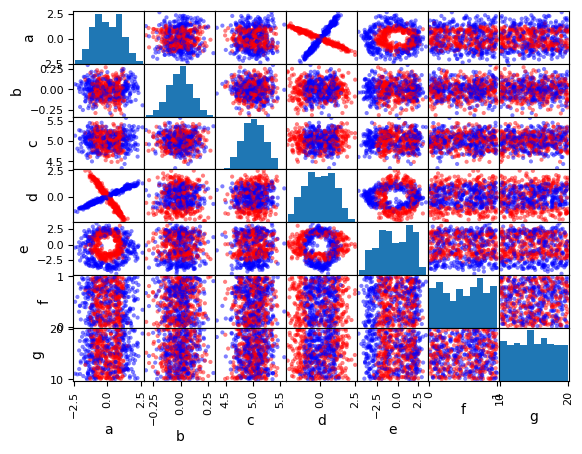

In [202]:
df = pd.read_csv("data_ml.csv")
df[df == 'c1'] = 0
df[df == 'c2'] = 1
cols = list(map(lambda x: "red" if x == 0 else "blue", df.iloc[:,0]))
pd.plotting.scatter_matrix(df.iloc[:,1:8], c=cols);